<a href="https://colab.research.google.com/github/Triumph-KT/Potential-Customer-Prediction/blob/main/Potential_Customer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to build machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [ ]:
# loading data from csv file into pandas dataframe
data = pd.read_csv("/content/ExtraaLearn.csv")

In [ ]:
# viewing first 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# viewing last 5 rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# viewing random sample of 10 rows of the data
data.sample(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
13,EXT014,23,Student,Website,High,3,115,2.690,Email Activity,No,No,No,No,No,0
1010,EXT1011,60,Professional,Website,High,1,1579,1.904,Email Activity,No,No,No,No,No,1
650,EXT651,36,Unemployed,Website,Medium,2,79,2.238,Phone Activity,No,No,No,No,No,0
2786,EXT2787,56,Professional,Mobile App,High,3,1094,2.204,Website Activity,No,No,No,No,No,0
2983,EXT2984,52,Professional,Mobile App,High,2,96,5.802,Email Activity,Yes,No,No,No,No,0
3675,EXT3676,57,Professional,Mobile App,Medium,1,58,2.286,Phone Activity,No,No,Yes,No,No,0
3189,EXT3190,51,Unemployed,Mobile App,Medium,5,283,3.874,Phone Activity,No,No,No,No,No,0
4318,EXT4319,26,Professional,Website,Medium,2,1854,3.505,Email Activity,No,No,No,No,No,1
826,EXT827,55,Professional,Website,High,2,316,3.261,Phone Activity,No,No,No,No,No,1
925,EXT926,57,Professional,Website,High,1,833,3.447,Email Activity,No,No,No,No,Yes,1


### Shape of the data

In [ ]:
data.shape

(4612, 15)

- We have 4612 rows and 15 columns

### Checking the datatypes and if any null values are present

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

- There are no null values for all columns
- We have 10 object/categorical columns and 5 numerical columns

### Checking number of unique values in each column

In [ ]:
print(data.nunique())

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


- Since all IDs are unique, we can safely drop this column as it wouldn't add value to our model

**Dropping the 'ID' column**

In [ ]:
data.drop(columns="ID", inplace=True)
data

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


### Renaming columns "print_media_type1" & "print_media_type2" to make them more descriptive

In [ ]:
data.rename(columns={'print_media_type1':'Newspaper_media', "print_media_type2": "Magazine_media"}, inplace=True)
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,Newspaper_media,Magazine_media,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Checking the summary statistics for the numerical columns of the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


- Based on age, we see that the leads are at least 18 years old
- There's likely outliers in website_visits since max value of 30 is way bigger than 5--the 75% precentile. We would explore further during EDA.
- For similar reasons, we might expect outliers in time_spent_on_website and page_views_per_visit.  We would explore further during EDA.
- Our dependent and target variable is "status" which takes values as either 1 or 0

### Checking the value counts in each category in the categorical variables

In [ ]:
# collecting all 10 categorical varibles in a list
cat_vars = ["current_occupation",
            "first_interaction",
            "profile_completed",
            "last_activity",
            "Newspaper_media",
            "Magazine_media",
            "digital_media",
            "educational_channels",
            "referral",
            "status"]

# using a for-loop to get the value count of each category in each categorical column
for col in cat_vars:
  print(data[col].value_counts())
  print("-"*50)


current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
Newspaper_media
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
Magazine_media
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name: cou

- There are more "professional" leads in current_occupation column
- There are only 107 leads with a "low" profile_completed
- There are only 93 leads who came through a referral

### Converting data type of these categorical variables "object" to "category"

In [ ]:
# Converting data type of these categorical variables "object" to "category"
for col in cat_vars:
  data[col]=data[col].astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   Newspaper_media        4612 non-null   category
 9   Magazine_media         4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   category
dtypes: category(10), float64(1), int64(3)
me

### Make a copy of our data

In [ ]:
df = data.copy()
df.sample(5)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,Newspaper_media,Magazine_media,digital_media,educational_channels,referral,status
3384,47,Professional,Website,High,2,1906,1.942,Email Activity,No,No,No,No,No,1
2519,23,Student,Mobile App,High,1,2348,5.248,Phone Activity,No,No,No,Yes,No,0
2141,54,Professional,Mobile App,Medium,3,65,2.279,Website Activity,No,No,No,No,No,0
1134,24,Student,Website,Medium,2,676,8.107,Email Activity,No,No,No,No,No,0
3844,59,Unemployed,Website,High,2,530,0.623,Phone Activity,No,No,No,No,No,1


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Univariate Analysis of Numerical Columns

In [ ]:
# Collecting all 4 numerical columns into a list
numer_vars = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit"]

# defining a function to plot both boxplot and histplot for each numerical variable
def box_hist(data, col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(10,6))
  # Creating the plots
  sns.boxplot(data=df, x=col, ax=ax_box, showmeans=True)
  sns.histplot(data=df, x=col, kde=True, ax=ax_hist)
  plt.show()


**age**

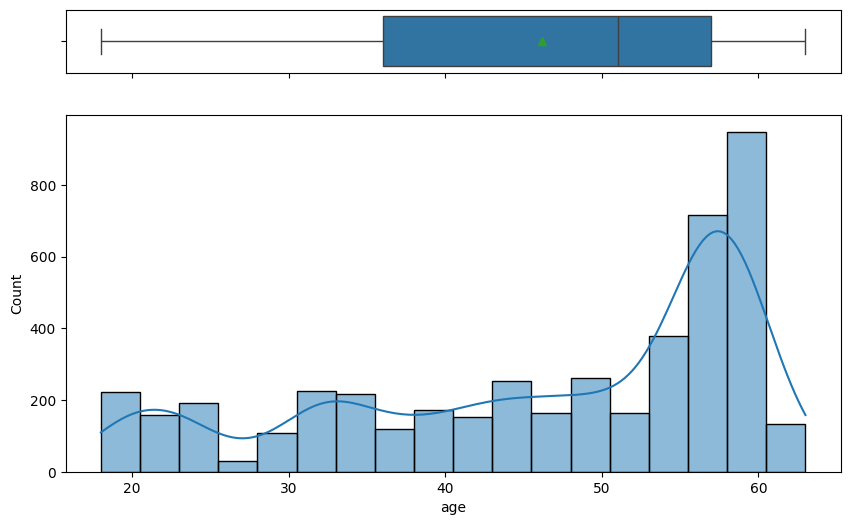

In [ ]:
box_hist(df, "age")

- In age, we have a left skew distribution and it appears there are no outliers
- The mean is around 45 but the median is around 52

**website_visits**

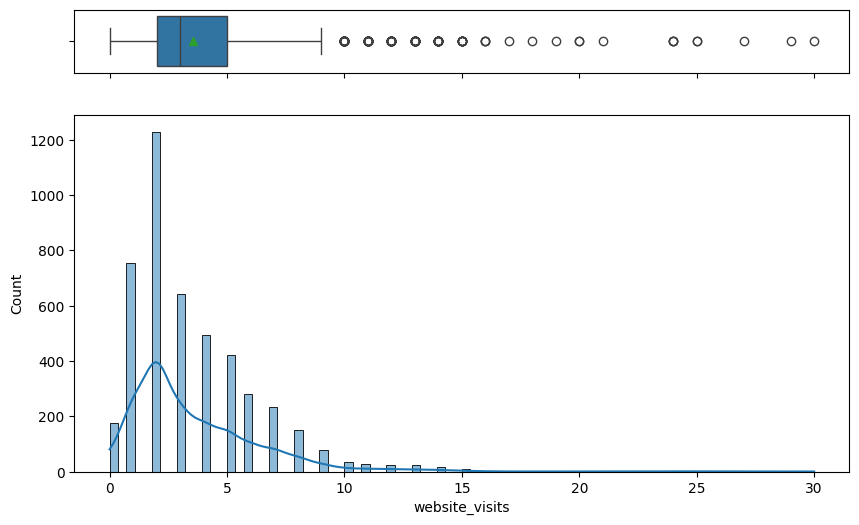

In [ ]:
box_hist(df, "website_visits")

- In "website_visits", we have a right skewed distribution with a good number of outliers on the right as we had expected.
- The median is around 2.5 while mean is around 3

**time_spent_on_website**

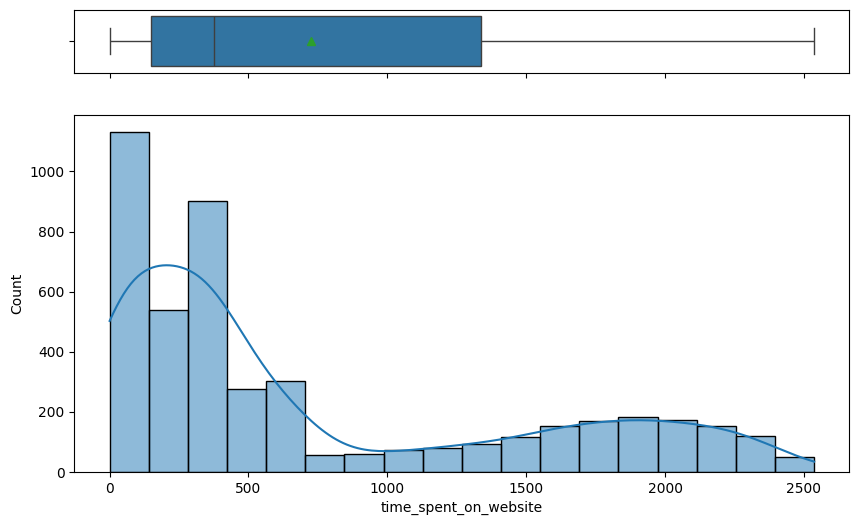

In [ ]:
box_hist(df, "time_spent_on_website")

- In time_spent_on_website, we also see a right skewed distribution but with no outlier.
- There's a prominent peak for values below 500 and another smaller peak aroung values above 1500

**page_views_per_visit**

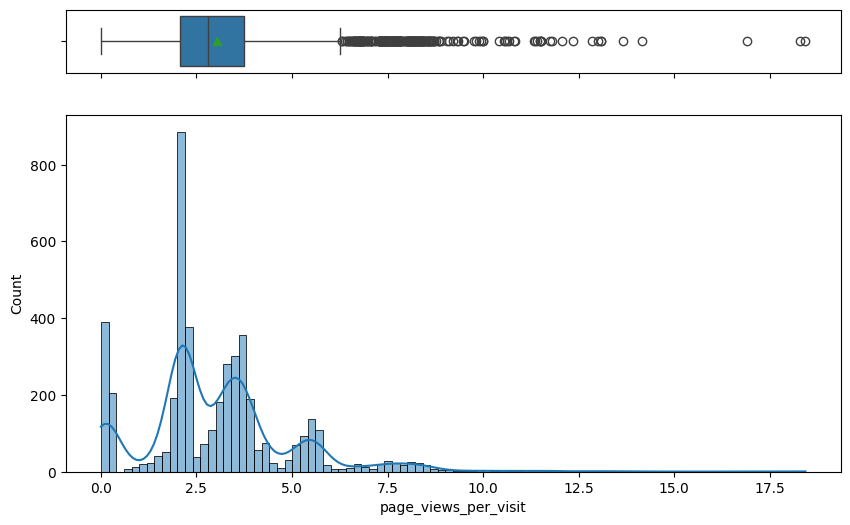

In [ ]:
box_hist(df, "page_views_per_visit")

- In page_views_per_visit, we see a multimodal distribution which has a right skew, and it has a lot of outliers to the right.

### Univariate Analysis of Categorical Columns

In [ ]:
# looking at the categorical columns
cat_vars

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'Newspaper_media',
 'Magazine_media',
 'digital_media',
 'educational_channels',
 'referral',
 'status']

In [ ]:
# Summary statistics of categorical columns
data.describe(include=["category"]).T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
Newspaper_media,4612,2,No,4115
Magazine_media,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519
status,4612,2,0,3235


- In status, most leads have a status of 0. i.e. most don't convert to paid customers.

#### Let's visualize the above table

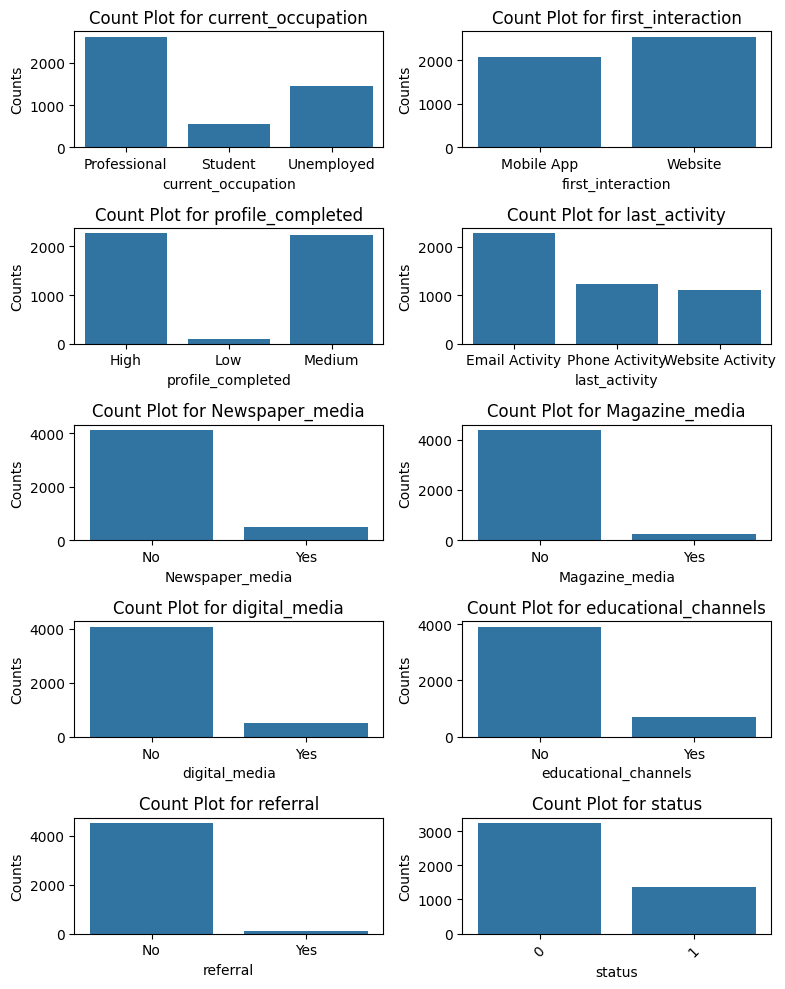

In [ ]:
# Setting up the figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))  # Adjusted to fit all 10 variables

# Flatten the axes array and zip it with the categories
axes = axes.flatten()
for ax, category in zip(axes, cat_vars):
    sns.countplot(x=category, data=df, ax=ax)
    ax.set_title(f'Count Plot for {category}')
    ax.set_xlabel(f'{category}')
    ax.set_ylabel('Counts')
    plt.xticks(rotation=45)  # to rotate x-axis labels for better readability

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Correlation matrix of numerical variables

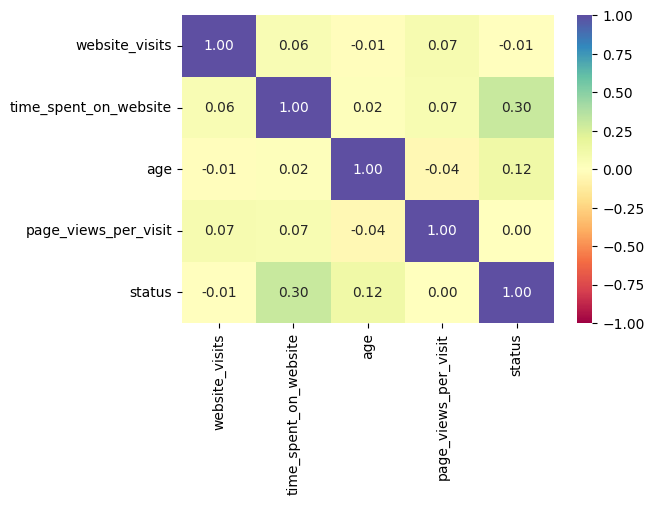

In [ ]:
# Calculating the correlation matrix
numeric_data = df[["website_visits", "time_spent_on_website", "age", "page_views_per_visit", "status"]]

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- We don't have a high correlation between independent columns
- We see that there's a 0.3 correlation between our target column 'status' and 'time_spent_on_website'. This is the highest correlation between an independent variable and the target "status"

#### Q1: current occupation vs lead status

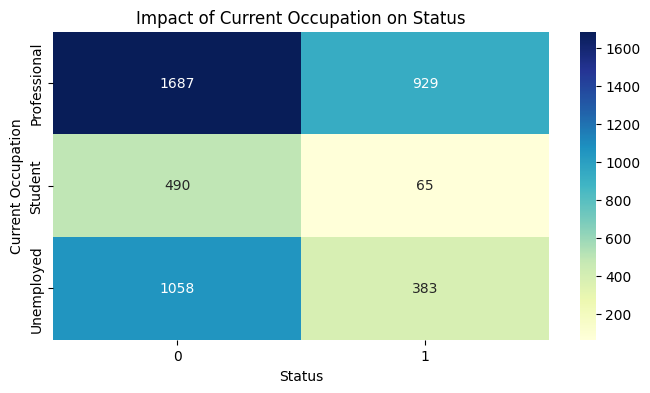

In [ ]:
# Creating a crosstab of 'current_occupation' and 'status'
ctab = pd.crosstab(df['current_occupation'], df['status'])

# Plotting the crosstab
plt.figure(figsize=(8, 4))
sns.heatmap(ctab, annot=True, cmap="YlGnBu", fmt='d')  # 'fmt' used to format the numbers as integers
plt.title('Impact of Current Occupation on Status')
plt.xlabel('Status')
plt.ylabel('Current Occupation')
plt.show()

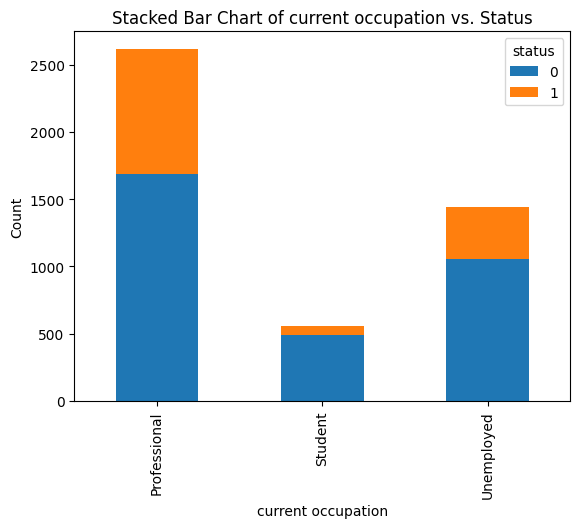

In [ ]:
# Stacked Bar Chart of 'current_occupation' and 'status'
pd.crosstab(df['current_occupation'], df['status']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of current occupation vs. Status')
plt.xlabel('current occupation')
plt.ylabel('Count')
plt.show()

- From these two plots, generally, more status 1 (leads that convert) are found in professionals than unemployed than student leads.
- Also, fewer students convert in the student category compared to professionals and unemployed.

#### Q2: Do the first channels of interaction have an impact on the lead status?

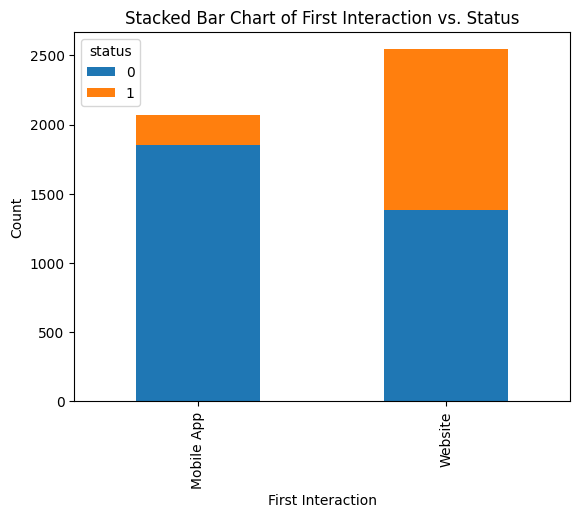

In [ ]:
# Stacked Bar Chart of 'first_interaction' and 'status'
pd.crosstab(df['first_interaction'], df['status']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of First Interaction vs. Status')
plt.xlabel('First Interaction')
plt.ylabel('Count')
plt.show()

- We see that leads whose first interation with the company was through the website have a higher number of conversion than leads whose first interaction was through the mobile app.  

#### Q3: Which way of interaction of company with leads works best?

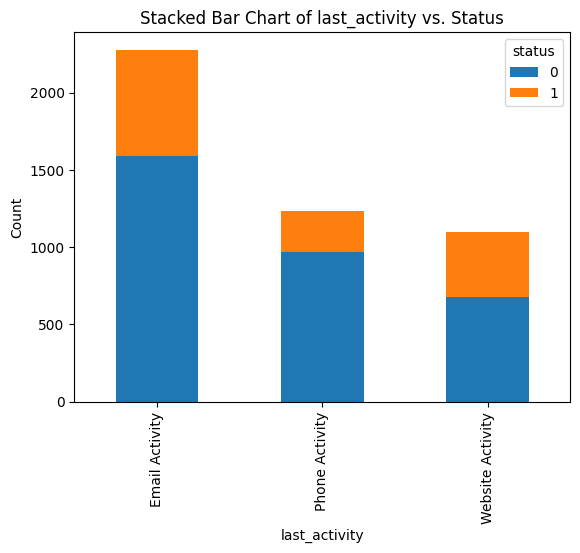

In [ ]:
# Stacked Bar Chart of 'last_activity' and 'status'
pd.crosstab(df['last_activity'], df['status']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of last_activity vs. Status')
plt.xlabel('last_activity')
plt.ylabel('Count')
plt.show()

- There are more converted leads for email activity than website activity than phone activity
- We also see more unsuccessful conversions in emails than phone than website

#### Q4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

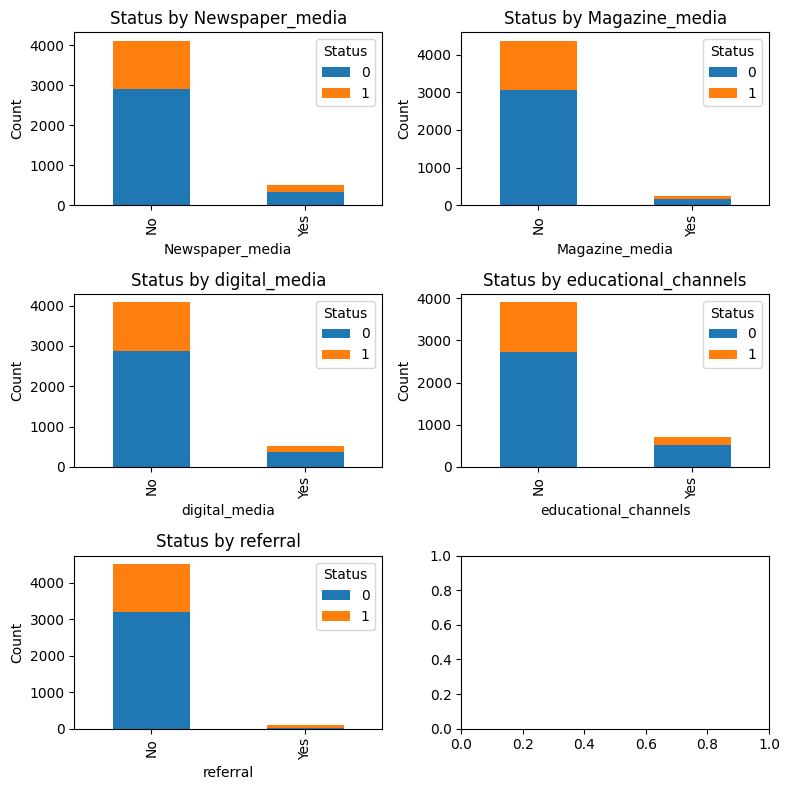

In [ ]:
# Columns to analyze with 'status'
columns = ["Newspaper_media", "Magazine_media", "digital_media", "educational_channels", "referral"]

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 8))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through the columns and create a plot for each
for ax, column in zip(axes, columns):
    # Create a crosstab of each media column with 'status'
    ctab = pd.crosstab(df[column], df['status'])
    ctab.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # colors for status 0 and 1, respectively
    ax.set_title(f'Status by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Status', labels=['0', '1'])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- In each of the channels above, we see that more conversion happen when the value is "No"
- We can calculate the conversion rates for each channel and do another plot to better understand which channel has a higher lead conversion rate

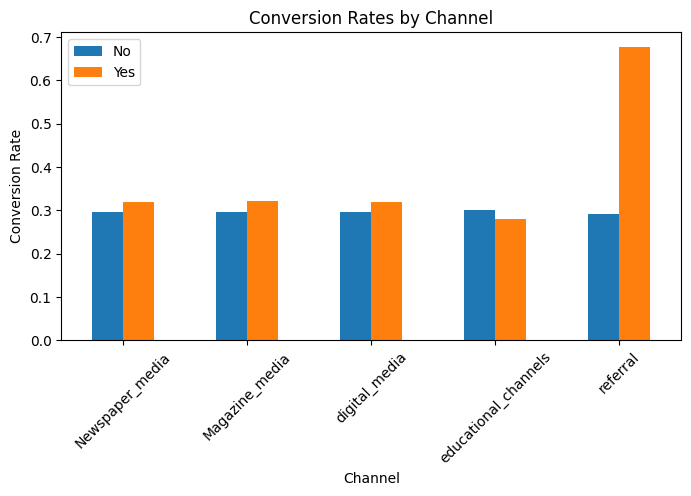

In [ ]:
channels = ['Newspaper_media', 'Magazine_media', 'digital_media', 'educational_channels', 'referral']
conversion_rates = {}

for channel in channels:
    # Create a crosstab of channel and status
    ctab = pd.crosstab(df[channel], df['status'])
    # Recall, 1 is the label for successful conversions in the 'status' column
    if 1 in ctab.columns:
        conversion_rate = ctab[1] / ctab.sum(axis=1)
    else:
        # Handle cases where no conversions might be labeled differently or need calculations
        conversion_rate = ctab.iloc[:, 1] / ctab.sum(axis=1)  # Adjust index based on your 'status' categories
    conversion_rates[channel] = conversion_rate

# Converting dictionary to DataFrame for better visualization
conversion_df = pd.DataFrame(conversion_rates).T
conversion_df.plot(kind='bar', figsize=(8, 4))
plt.title('Conversion Rates by Channel')
plt.ylabel('Conversion Rate')
plt.xlabel('Channel')
plt.xticks(rotation=45)
plt.show()

- From the plot, the "referral" channel has the highest lead conversion rate

#### Q5: Does having more details about a prospect increase the chances of conversion?

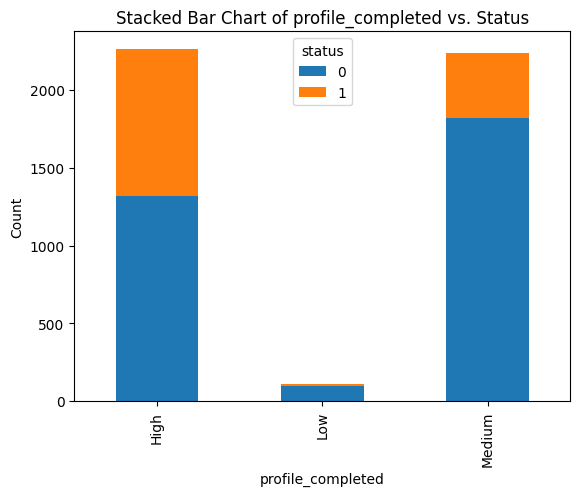

In [ ]:
# Stacked Bar Chart of 'profile_completed' and 'status'
pd.crosstab(df['profile_completed'], df['status']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of profile_completed vs. Status')
plt.xlabel('profile_completed')
plt.ylabel('Count')
plt.show()

- Yes, having more details of a propect shows increase in conversions.
- Highly completed profiles have more conversions than medium and than low completed profiles.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing value treatment
- There were no missing values in our dataset

In [ ]:
# Checking if any missing values in dataset
print(df.isna().sum())

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
Newspaper_media          0
Magazine_media           0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


#### Checking outliers in numerical columns

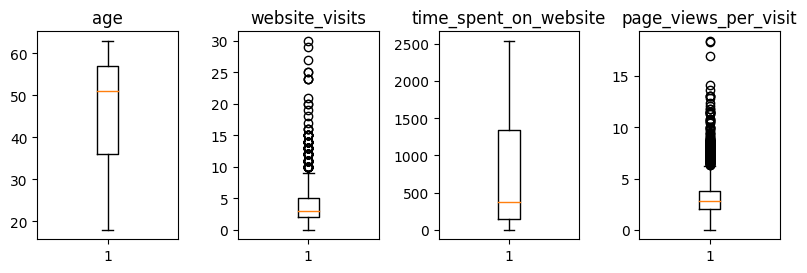

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(8, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- As seen in earlier plots, we have outliers in 2 out of 4 of the numerical columns.
- Though we have these outliers, we can safely not do anything to them since in this case they are valid and contribute to our findings.

#### Feature engineering

In [ ]:
# Creating list of categorical columns to get dummies for
df_to_get_dummies_for = ["current_occupation",
                         "first_interaction",
                         "profile_completed",
                         "last_activity",
                         "Newspaper_media",
                         "Magazine_media",
                         "digital_media",
                         "educational_channels",
                         "referral"]


# Creating dummy variables for the categorical columns
df = pd.get_dummies(
    df,
    columns = df_to_get_dummies_for,
    drop_first = True,
)
df

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,Newspaper_media_Yes,Magazine_media_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,0,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,1,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,0,False,False,False,False,True,False,True,True,False,False,False,False


In [ ]:
# Separating the independent variables (X) and the dependent variable (Y)
X = df.drop(columns="status")
Y = df['status']

In [ ]:
# Splitting the dataset into the Training (70%) and Testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

# Checking the shape of the Train and Test sets
print('X Train:', X_train.shape);
print('X Test:', X_test.shape);
print('Y Train:', y_train.shape);
print('Y Test:', y_test.shape);

X Train: (3228, 16)
X Test: (1384, 16)
Y Train: (3228,)
Y Test: (1384,)


## EDA

- It is a good idea to explore the data once again after manipulating it.

**Since we didn't utter the values in our data during preprocessing, we would safely not perform further EDA**

## Creating Metric function to use for each model

In [ ]:
# Creating metric function to evaluate each model
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

#### 1) Building decision tree w/ training set

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### 2) Checking performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



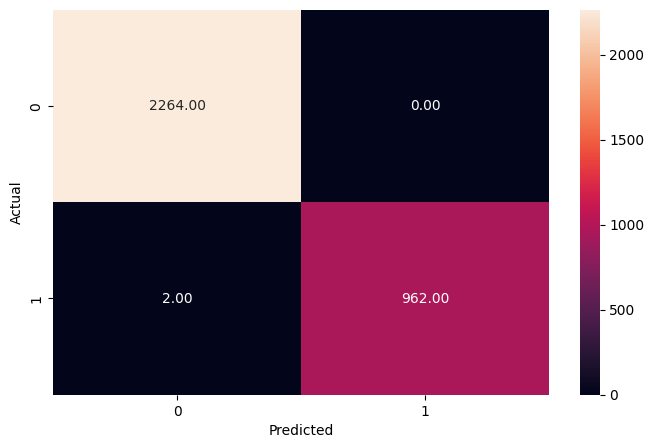

In [ ]:
 # Checking performance on training set
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

- The model performed too well on the training set
- There is about 0 errors (the model has 100% score for all metrics above) indicating that the tree might have grown to fit all the data and possibly might have overfitted.
- We proceed to run the model on the test dataset to check if it has overfitted on our training set.

#### 3) Checking performance on test set

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



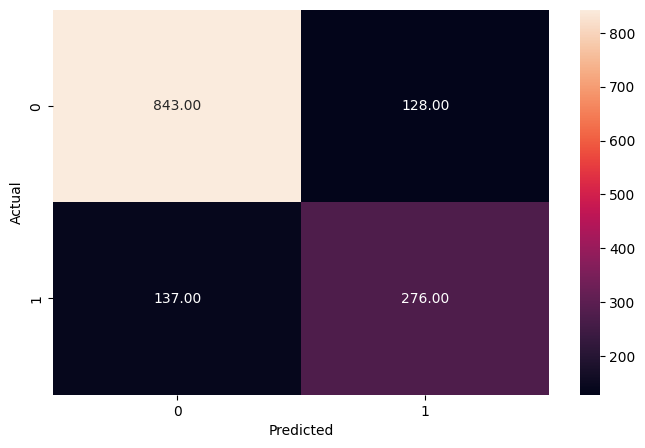

In [ ]:
# Checking performance on test set
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

- We see that the model overfitted on the training data because while it had 100% score on all metrics in training set, it performs significantly lower as seen on the metrics on the test set above.
- We could proceed with hyperparameter tuning to reduce the overfitting.
- A precision of 68% shows that the model would propose a 32% likelihood that a lead who will convert to a paid customer will in fact not convert. This may cause the business to waste resources on these leads trying to make them convert.
- So, we would need to reduce this error by tuning.

#### 4) Performing hyperparameter tuning for the decision tree model using GridSearch CV

In [ ]:
# Choose the type of classifier.
dt_estimator_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100),
    "max_leaf_nodes": [50, 75, 150, 250],
    'criterion': ['gini', 'entropy'],
}
# Run the grid search
grid_obj = GridSearchCV(dt_estimator_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dt_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_estimator_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, random_state=1)

#### 5) Checking performance of tuned decision tree model on the training set

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



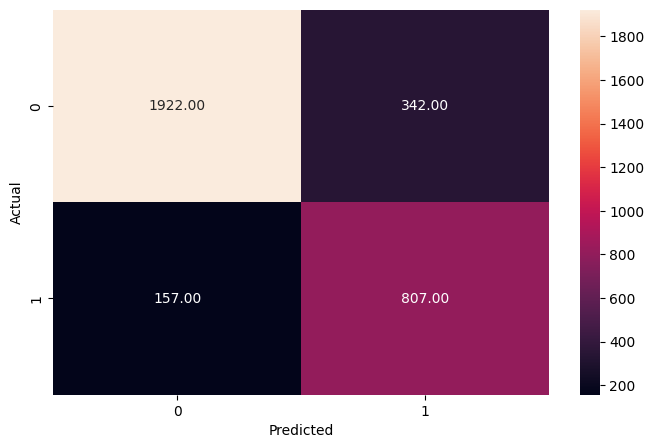

In [ ]:
# Checking performance on the training dataset
tuned_train_dt = dt_estimator_tuned.predict(X_train)
metrics_score(y_train,tuned_train_dt)

#### 6) Checking performance of tuned decision tree model on the test set

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



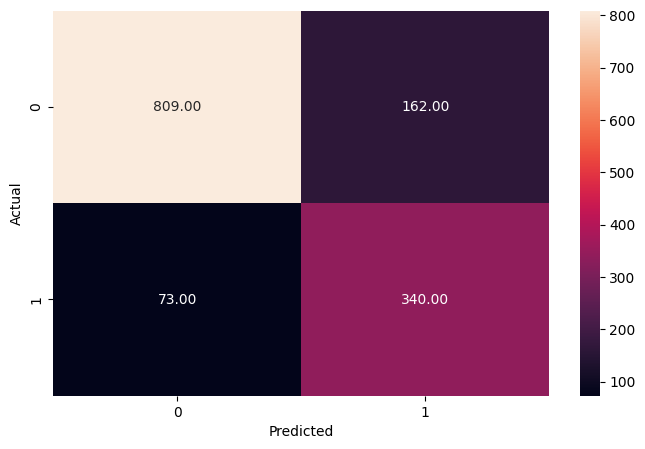

In [ ]:
# Checking performance on the test dataset
tuned_test_dt = dt_estimator_tuned.predict(X_test)
metrics_score(y_test,tuned_test_dt)

- We see improvements in the metric scores after hyperparameter tuning for the test data.
- Also, on the training data, after hyperparameter tunining, we see a drop in overfitting. Overfitting is reduced, i.e. our metric scores are not so different between the training and testing sets. For example, the recall values of the training set is 0.84 and of the testing set is 0.82.
- We would use other models like random forest to try to get a better model--i.e. reduce overfitting further.

#### 7) Visualizing some nodes of the decision tree

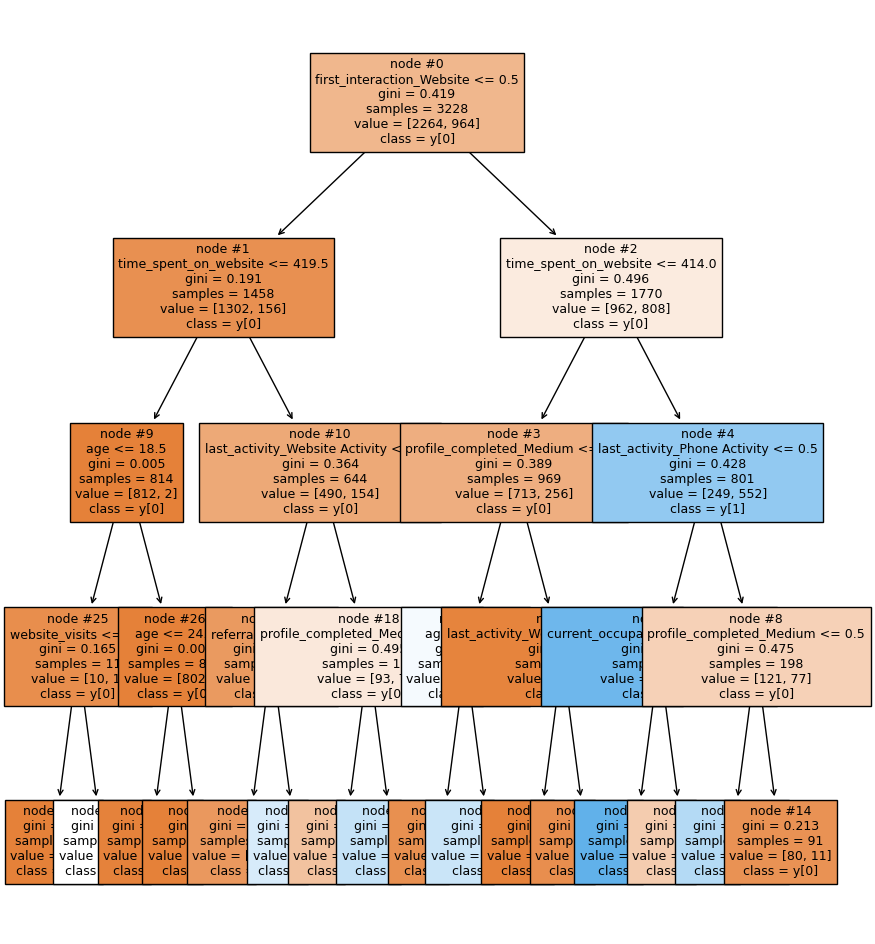

In [ ]:
features = list(X.columns)
plt.figure(figsize = (10, 12))
tree.plot_tree(dt_estimator_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
plt.show()

- "first_interaction_website" is the first feature, found in the parent node of the tree. It means this feauture gives the highest information gain.
- More orange nodes belong to the y[0] class while blue ones belong to the y[1] class

#### 8) Important features for decision trees

<Axes: xlabel='Importance', ylabel='None'>

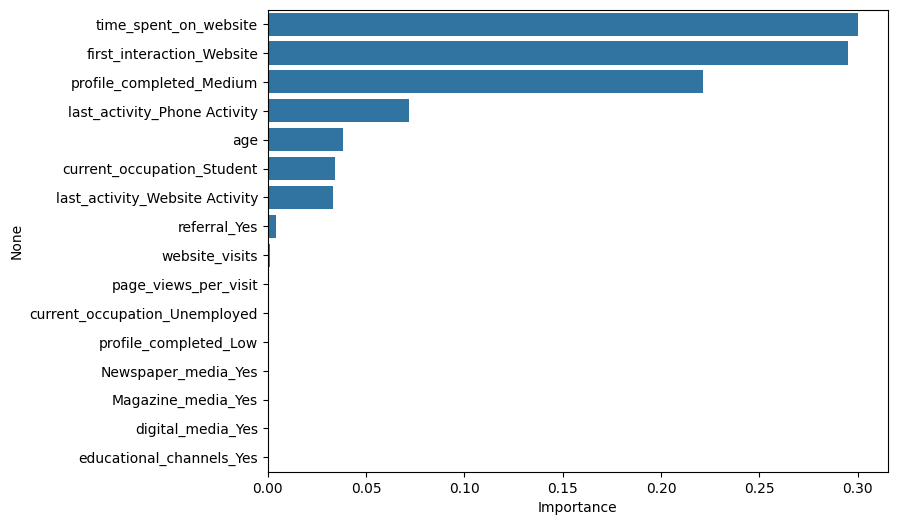

In [ ]:
# Important features for decision tree
importances = dt_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 6))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

- The top 3 most important features according to the decision tree model are time_spent_on_website, first_interaction_website, and profile_completed_medium.

- This might indicated that leads who are more likely to convert would tend to have more time spent on the website and more interaction on the website with a more completed profile as well.

## Do we need to prune the tree?

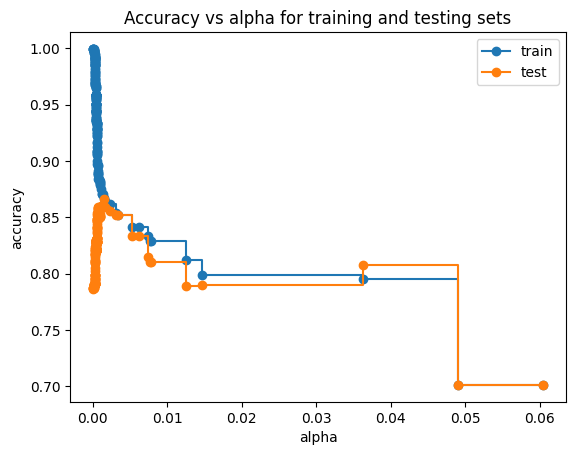

In [ ]:
# Train a decision tree classifier to get the cost complexity prunings
tree = DecisionTreeClassifier(random_state=1)
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a decision tree using each alpha and test its accuracy
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot the accuracy of the trees using the test set
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- Generally, tree pruning helps to reduce overfitting of the decision tree, but we see that the ideal accuracy in the above plot is at around 0.85, but this value is not so different from the 0.85 for training and 0.83 for testing sets in the actual tuned decision tree model.
- So, instead of prunning, we could build other models like the random forest which is very suitable to curbing the issue of overfitting.

## Building a Random Forest model

#### 1) Building random forest w/ training set

In [ ]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### 2) Checking performance of random forest on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



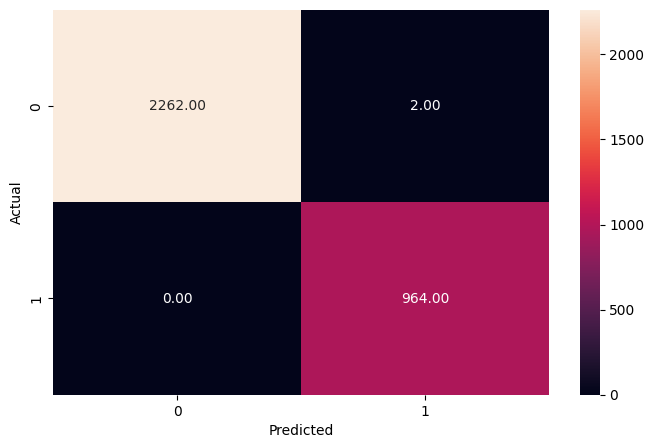

In [ ]:
y_pred_train_rf = model_rf.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

- The model performed too well on the training set
- There is about 0 errors (the model has 100% score for all metrics above) indicating that the random forest might have grown to fit all the data and possibly might have overfitted.
- We proceed to run the model on the test dataset to check if it has overfitted on our training set.

#### 3) Checking rf performance on test set

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



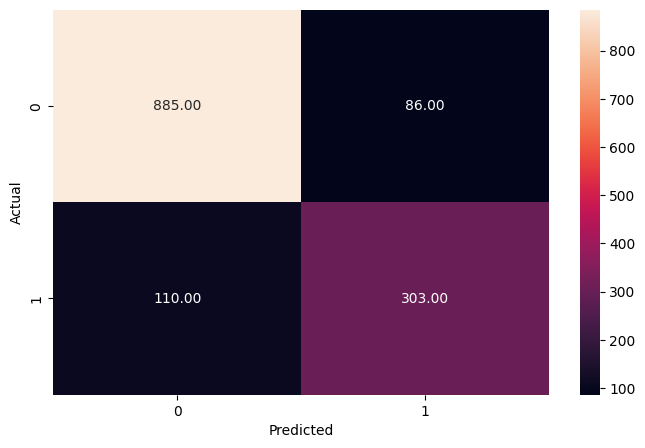

In [ ]:
# Checking performance on test set
pred_test_dt = model_rf.predict(X_test)
metrics_score(y_test, pred_test_dt)

- The metric scores tell us that the rf has overfitted on the training data because all the scores are significantly lower in the test set than in the training set. And also because there's about 100% perfect score for all metrics in running the rf model on the training set.
- However, we see an improvement the rf model has on the test set than the decision tree had on the test set. On test set, accuracy of rf is 0.86 while dt had 0.81.
- With hyperparamter tuning, we hope to improve the model performance and hence reduce overfitting.

#### 4) Performing hyperparameter tuning for the rf model using GridSearch CV

In [ ]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'n_estimators': [100, 120],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [1, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [20, 25],
    'bootstrap': [True, False],
    "max_samples": [0.9, 1],
    'criterion': ['gini', 'entropy'],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=7, max_samples=0.9, min_samples_leaf=25,
                       random_state=1)

#### 5) Checking performance of tuned rf model on the training set

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2264
           1       0.69      0.88      0.78       964

    accuracy                           0.85      3228
   macro avg       0.82      0.86      0.83      3228
weighted avg       0.87      0.85      0.85      3228



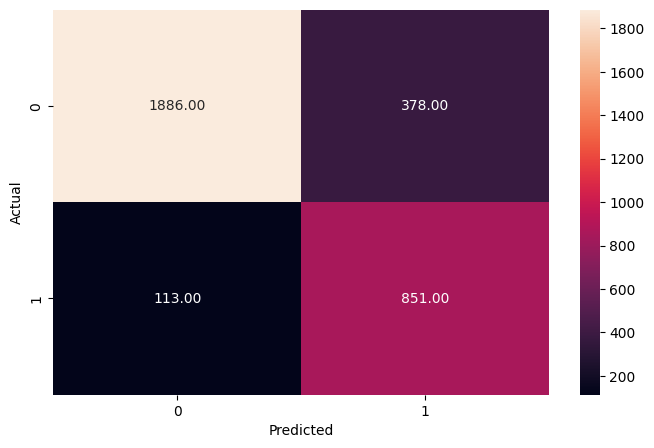

In [ ]:
# Checking performance on the training dataset
tuned_train_rf = rf_estimator_tuned.predict(X_train)
metrics_score(y_train,tuned_train_rf)

#### 6) Checking performance of tuned rf model on the test set

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       971
           1       0.67      0.85      0.75       413

    accuracy                           0.83      1384
   macro avg       0.80      0.84      0.81      1384
weighted avg       0.85      0.83      0.84      1384



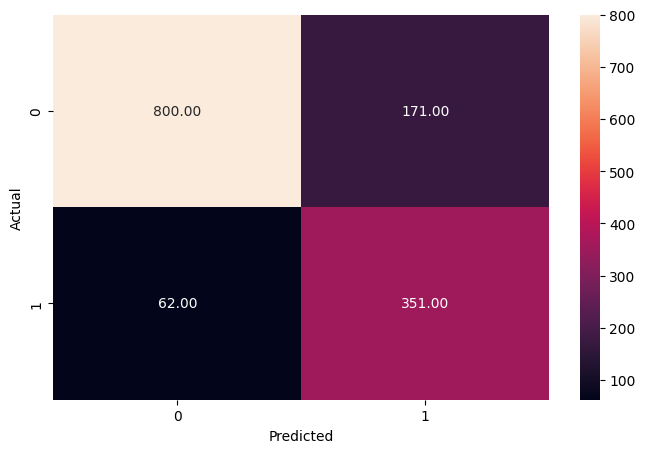

In [ ]:
# Checking performance on the test dataset
tuned_test_rf = rf_estimator_tuned.predict(X_test)
metrics_score(y_test,tuned_test_rf)

- We see a further reduction in overfitting in the tuned random forest model.
- The recall score of the training set is 0.88 and that of the testing set is 0.85, which are values slightly bigger than what we had in the tuned decision tree model.

#### 7) Important features for random forest

***It's hard to visualize the operation of the random forest model like we did for the decision tree, so we proceed to understand the feature importance.***

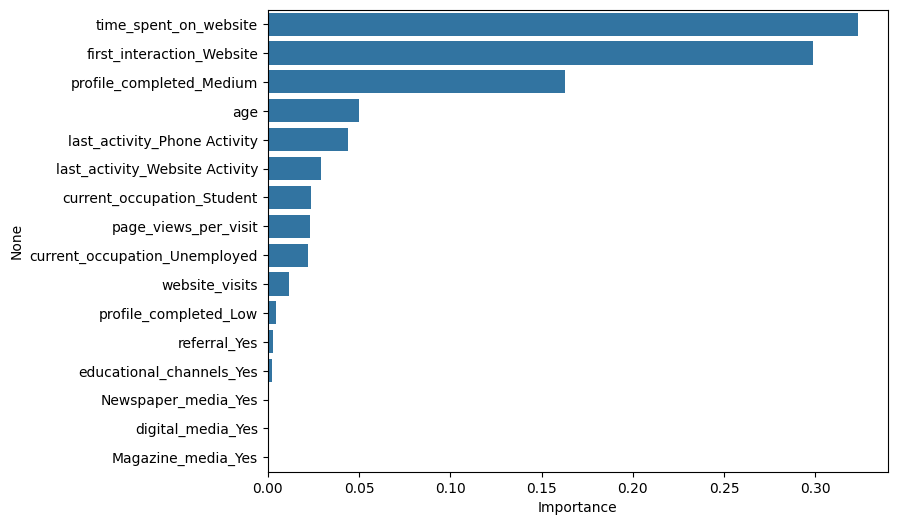

In [ ]:
# Important features for decision tree
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 6))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index);

- The tuned random forest shows the same top 3 important features, in the same order, as in the tuned decision tree model.
- The top 4th and 5th important features have swapped order in the tuned random forest model as compared to their order in tuned decision tree.

## Do we need to prune the tree?

- The random forest is made up of an ensemble of decision trees that work to produce better result than a single decision tree.
- So, while it might be needed to prune a single decision tree to reduce overfitting, we could get better performance by just doing random forest and tuning the hyperparameters.
- So, we don't need to do tree pruning.

## Actionable Insights and Recommendations

### Actionable Insights

####Interaction and Engagement Metrics:
- Time Spent on Website: There is a positive correlation between time spent on the website and lead conversion. Leads that spend more time on the website tend to have a higher probability of converting. This indicates that engaging content or interactive elements that increase time spent on the website can enhance conversion rates.
- First Interaction: Leads whose first interaction is through the website show higher conversion rates compared to those whose first interaction is via the mobile app. This suggests that the website may be more effective at capturing and converting leads, possibly due to richer content or better user experience.

####Demographics and Personal Details:
- Profile Completion: Leads with more complete profiles are more likely to convert. A complete profile may indicate a higher level of lead engagement and commitment. Encouraging leads to fully complete their profiles could be a strategy to increase conversions.
- Current Occupation: Professionals are converting at a higher rate than students and unemployed individuals, which could reflect their ability to afford or their need for further education and training.

####Marketing Channels:
- Referral Channels: Although less common, leads that come through referrals have higher conversion rates. This suggests that strengthening referral programs or incentives could yield high-value leads.
- Digital vs. Print Media: Despite the extensive use of digital media, there is a need to evaluate the effectiveness of different types of digital marketing strategies, as the conversion impact is not as high as expected.


###Recommendations

####Enhance Website User Experience:
- Improve the user interface and user experience of the website to keep potential leads engaged longer. This could involve simplifying the navigation, enhancing the quality of content, and adding interactive elements that encourage longer visits.

####Optimize First Interaction:
- Since the first interaction through the website leads to higher conversions, consider directing more marketing efforts to drive potential leads to the website rather than the mobile app.

####Boost Profile Completion:
- Implement strategies to encourage complete profile submissions, such as gamification rewards at different completion stages or immediate benefits for completing the profile.

####Expand and Promote Referral Programs:
- Given the effectiveness of referral channels, develop more robust referral programs with incentives for both referrers and referees. This approach can leverage existing satisfied customers to bring in leads that are more likely to convert.

####Use Data-Driven Insights for Targeted Campaigns:
- Segment leads based on their occupation, engagement levels, and initial interaction channels to tailor marketing messages and campaigns. For example, targeted campaigns for professionals highlighting career advancement could be more effective.

####Continuous Monitoring and Analysis:
- Regularly review the performance of different channels and strategies. Use A/B testing to experiment with new approaches and continuously refine strategies based on what the data shows are the most effective practices.